In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from lab_lib import *

In [6]:
"""
I. 7.
"""

f_0 = (162.1 * 1e6, 0.1 * 1e6)
omega_0 = countWithSigma(2*np.pi * f_0[0], [f_0])

U_r = [(i*1e-3, 1e-3) for i in [177, 180, 179, 179]]

omega_var = tuple(2*np.pi*i for i in (50, 5))

d = (14.9*1e-3, 0.1*1e-3)
N = 44
S = countWithSigma(np.pi * d[0]**2 / 4, [d])

magneton_bora = 927.4 * 10**-26
h_plank       = 1.054 * 10**-34

"""
I. 8.
"""

probe_measure = [[10.1,  0.09,   0.07],
                 [29.8,  2.59,   2.05],
                 [70.0,  5.88,   4.78],
                 [120.3, 10.13,  8.27],
                 [160.5, 13.42, 10.91],
                 [180.1, 15.03, 12.28],
                 [199.2, 16.61, 13.53]]

probe_table = [[r"$U_r, мВ$", r"$\epsilon_{спереди}, мВ$", r"$\epsilon_{сзади}, мВ$"]]
for i in probe_measure:
    probe_table.append(i)

texTable(probe_table)

def get_B(U_r):
    x    = [i[0] for i in probe_measure]
    xerr = [0.1]*len(probe_measure)
    y    = [meanWithInacc(((i[1], 0.01), (i[2], 0.01)))[0] for i in probe_measure]
    yerr = [meanWithInacc(((i[1], 0.01), (i[2], 0.01)))[1] for i in probe_measure]

    k = make_mnk_direct_prop("img/probe_plot.png", r"График зависимости ЭДС индукции в пробной катушке от падения напряжения на резисторе в цепи питания катушки", r"$U, мВ$", r"$\epsilon, мВ$", x, y, xerr, yerr)

    eps = countWithSigma(k[0] * U_r[0], [k, U_r])

    print(r"$\epsilon = $", texAns(eps))

    B = countWithSigma(eps[0] / (S[0] * N * omega_var[0]), [eps, S, omega_var])
    return B



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U_r, мВ$ & $\epsilon_{спереди}, мВ$ & $\epsilon_{сзади}, мВ$\\ \hline
        10.1 & 0.09 & 0.07\\ \hline
        29.8 & 2.59 & 2.05\\ \hline
        70.0 & 5.88 & 4.78\\ \hline
        120.3 & 10.13 & 8.27\\ \hline
        160.5 & 13.42 & 10.91\\ \hline
        180.1 & 15.03 & 12.28\\ \hline
        199.2 & 16.61 & 13.53\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



$<U_r> = $ $0.1788 \pm 0.0012$
k: (0.07580826095474348 +- 0.000824100322432453)


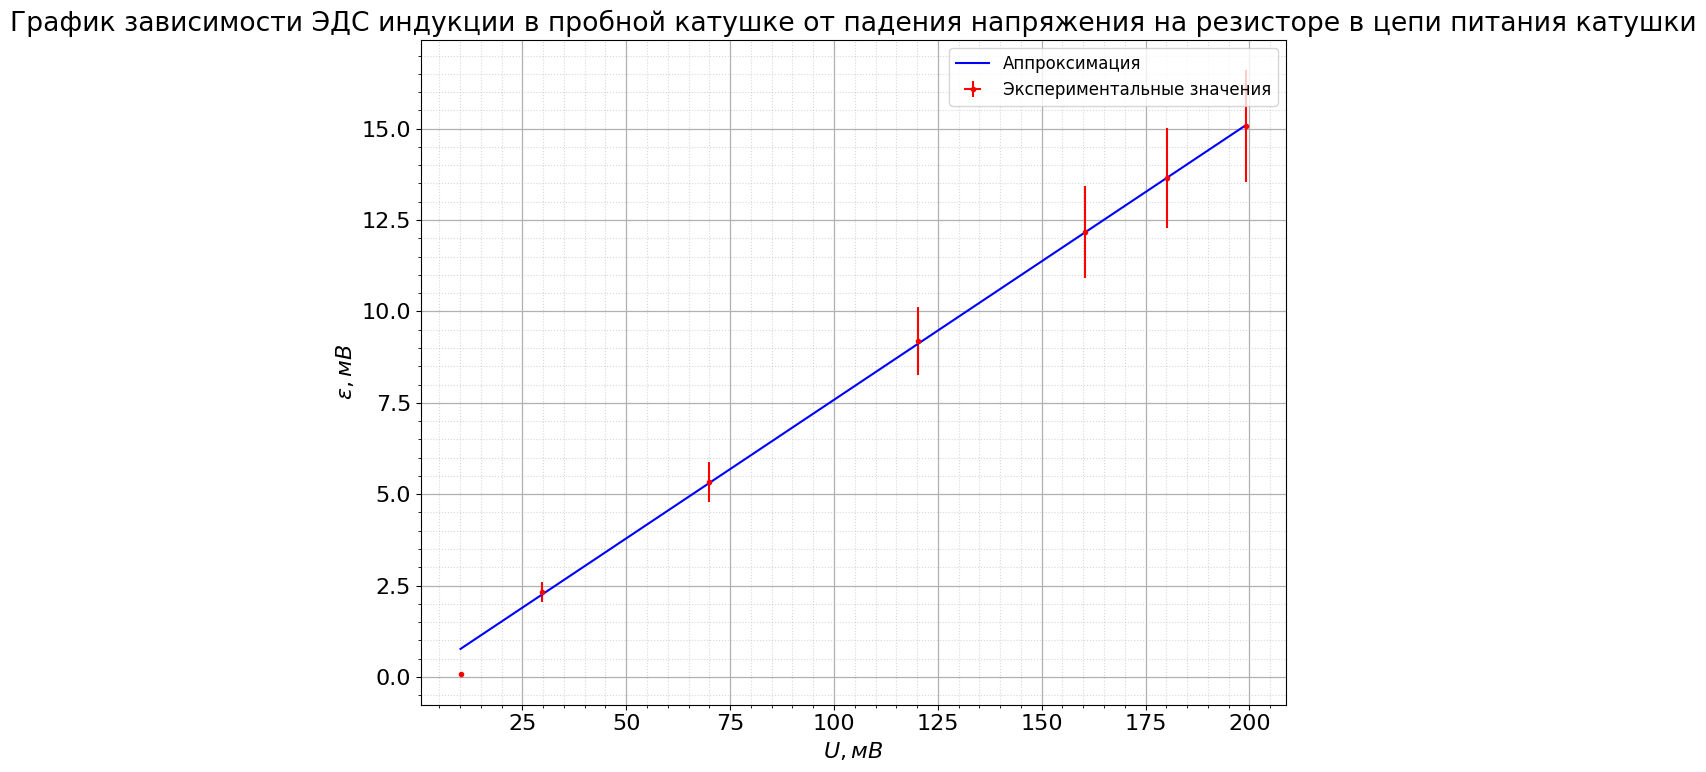

$\epsilon = $ $0.0136 \pm 0.0002$
B $0.0056 \pm 0.0006$
$g =$ $2.1 \pm 0.2$


In [14]:
U_r_mean = meanWithInacc(U_r)

print(r"$<U_r> = $", texAns(U_r_mean))

B = get_B(U_r_mean)

print("B", texAns(B))

g = countWithSigma(h_plank * omega_0[0] / (magneton_bora * B[0]), [B, omega_0])

print(r"$g =$", texAns(g))

In [13]:
"""
II. 1.
"""

Delta_l  = (0.5, 0.2)
Double_L = (6.8, 0.2)

Eps1 = (4.52, 0.01)
Eps2 = (4.33, 0.01)

Eps_mean = meanWithInacc([Eps1, Eps2])

print("Eps_mean", texAns(Eps_mean))

B_mod = countWithSigma(Eps_mean[0] / (S[0] * N * omega_var[0]), [Eps_mean, S, omega_var])


print(r"$B_{мод} = $", texAns(B_mod), r"$мТл$")

Delta_B = countWithSigma(Delta_l[0] / Double_L[0] * B_mod[0], [Delta_l, Double_L, B_mod])

print(r"$\Delta B$ =", texAns(Delta_B), r"$мТл$")

Eps_mean $4.42 \pm 0.10$
$B_{мод} = $ $1.8 \pm 0.2$ $мТл$
$\Delta B$ = $0.13 \pm 0.06$ $мТл$
